# HW 5
## CS156, Kai Chang

### Question 1
Answer Choice: **C**, 100 <br>
Reasoning: Using Mathematica, we want $E_in$ to be $> 0.008$, meaning that we want the minimal # of examples ($N$) given in the answer choices that accurately reflect a value $> 0.008$. So, plugging into Mathematica the following 

+ Solve[0.008 == 0.1^2*(1 - (8 + 1)/x), x]

We arrive that $x$, or in our case $x = N$ is exactly 45, meaning that we need the next value larger than 45 to get an error greater than 0.008. Thus, C is the correct choice.

### Question 2
Answer Choice: **D**, $\tilde w_1 < 0, \tilde w_2 > 0$ <br>
Reasoning: Originally, I thought about the fact that when we transform these two values by squring them, we result in a positive value across all scales. This led me to believe that the weights are all bound by positivity. However, this would never allow me to correctly classify my points. In order for this hyperbolic problem to work, we would need to have the two weights corresponding to both $x_1^2$ and $x_2^2$ be of opposite signs such that we could potentially classify based on these boundaries. 

If we have our weight on the $x_1$ be negative then for all large values of $x_1$ in magnitude (because we are squaring), we will more likely get a domination of the negative weight, giving us a -1 hypothesis (sign function). If we have a positive weight on $x_2$, then we would more likely get a positive domination in the classification from our transformation, and result in a +1.

Thus, this is why D is the only valid choice. Note any magnitude change or shift can be adjusted by the $w_0$ term, and any slope change in the hyperbolic decision boundary can be adjusted by the ratio of $w_1$ and $w_2$.

### Question 3
Answer Choice: **C** <br>
Reasoning: From the *Learning from Data* book, we know that linear regression is often coupled with a feature transform to perform nonlinear regression, and that the $N$ by $d+1$ input matrix X in the algoirthm is replaced with the $N$ by a $\tilde d + 1$ matrix $Z$, while the ouput vector remians the same. The VC dimensionality increase ($d_{vc}$) is still $n+1$, so in an n-dimensional polynomial ($Z$ degree n), it's simply $n+1$, that $w_0$.

### Question 4
Answer Choice: **E**, $2 \left ( e^v + 2ve^{-u} \right )\left( ue^v - 2ve^{-u} \right)$ <br>
Reasoning: Partial derivatives suggest derivatives without consideration of dependent variables. Thus, the partial derivative is as follows:

\begin{align}
    \frac{\partial E}{\partial u} &= \frac{\partial \left ( ue^v - 2ve^{-u} \right )^2}{\partial u} \\
    &= 2 \left( ue^v - 2ve^{-u} \right) * \frac{\partial \left ( ue^v - 2ve^{-u} \right )}{\partial u} \\
    &= 2 \left( ue^v - 2ve^{-u} \right) \left ( e^v - 2ve^{-u}*\frac{-\partial u}{\partial u} \right) \\
    &= 2 \left( ue^v - 2ve^{-u} \right) \left ( e^v + 2ve^{-u} \right )
\end{align}

which matches with answer choice e.

### Question 5
Answer Choice: **D**, 10<br>
Reasoning: See code. We know that gradient descent is given by $(u_{t+1}, v_{t+1}) = (u_t, v_t) - \eta \triangledown(u,v)$ (originally I had written $+\eta$, but that gave me a value not given in the item choice and I realized it was wrong. So we just calculate the gradient as by Mathematica:

+ Grad[(u*Exp[v] - 2*v*Exp[-u])^2, {u, v}]

and then run the iterations, and stop when the error gets is wihtin range.

In [2]:
import numpy as np
def E_func(u, v):
    return (u*np.exp(v) - 2*v*np.exp(-u))**2

def update(u, v, eta):
    d_u = lambda u,v: 2*(np.exp(v)*u - 2*np.exp(-u)*v)*(np.exp(v) + 2*np.exp(-u)*v)
    d_v = lambda u,v: 2*(-2*np.exp(-u) + np.exp(v)*u)*(np.exp(v)*u - 2*np.exp(-u)*v)
    
    return u - eta * d_u(u,v) , v - eta * d_v(u,v)
    
u = 1
v = 1
eta = 0.1


for i in xrange(17):
    if E_func(u, v) > 10**(-14):
        u, v = update(u, v, eta)
    else:
        print i
        break

10


### Question 6
Answer Choice: **E**, (0.045, 0.024)<br>
Reasoning: See code.

In [7]:
print u,v

0.0447362903978 0.0239587140991


### Question 7
Answer Choice: **A**, $10^{-1}$<br>
Reasoning: see code. The point of this question is to show that we must update our parameters at the same time, otherwise, it will take exponentially longer to get to an appropriate minima or maxima. This has to do with the fact that although the gradients are independent of each other (change), with the physical gradient descent update rule, they are strictly tied to each other when deciding the next step in u.

In [8]:
def coord_update(u, v, eta):
    d_u = lambda u,v: 2*(np.exp(v)*u - 2*np.exp(-u)*v)*(np.exp(v) + 2*np.exp(-u)*v)
    u = u - eta * d_u(u,v)
    d_v = lambda u,v: 2*(-2*np.exp(-u) + np.exp(v)*u)*(np.exp(v)*u - 2*np.exp(-u)*v)
    v = v - eta * d_v(u,v)
    
    return u, v

u = 1
v = 1
eta = 0.1

for i in xrange(15):
    u, v = coord_update(u, v, eta)
    
print E_func(u, v)

0.139813791996


### Question 8
Answer Choice: **D**, 0.100<br>
Reasoning: see code.

Remember, random permutation means that we have to go through all the training data for a single epoch -- ie. we simple shuffle the order in which we analyze our gradient descent. A more intuitive way to think about it is picking which data point to analyze or update with without putting that point back into the list we pick from.

In [4]:
import random as rnd

def gen_line():
    '''
    Generate boundary line for classification
    
    Returns
    -------
    2 2-dimensional array consisting of your line in form [w0, w1, w2] and [w0, w1_norm, w2_norm]
    
    '''
    # apparently from [-1.0, 1.0], but upper boundary not guaranteed
    # because of float's precision and rounding issues
    [x1,x2,y1,y2] = [rnd.uniform(-1.0, 1.0), rnd.uniform(-1.0, 1.0), rnd.uniform(-1.0, 1.0), rnd.uniform(-1.0, 1.0)] 
    w = np.array([x2*y1-y2*x1, y2-y1, x1-x2])
#     w_norm = np.array([1, -w[1]/w[2], -w[0]/w[2]]) #standard mx+b equation
    return w, [x1,x2,y1,y2]
    
def gen_pts(n, d, w=None):
    '''
    Generates random points from a uniform distribution over -1,1
    
    Parameters
    ----------
    n : number of points
    d : dimension of image
    
    Returns
    -------
    d-dimensional array consisting of n-number of uniform, random points, and a clean slate sign
    '''
    if w is None:
        w, li = gen_line()
        
    d_ = np.random.uniform(-1.0, 1.0,(d,n))
    x_ = np.append(np.ones(n), d_).reshape((d+1,n))
    y = np.sign(np.dot(w.T,x_))
    d_ = np.append(x_, y).reshape((d+2,n))

    print d_.shape
    return w, d_

def compute_gradient(w, x_n, y_n):
    '''
    Computes the gradient for SGD
    
    Parameters
    ----------
    w    : current weights    
    x_n  : training point information (1, x1, x2)
    y_n  : solution to training point
    
    Returns
    -------
    gradient needed for the weight update (v_t)
    '''
    return -y_n*x_n/(1+np.exp(y_n*np.dot(w.T,x_n)))
    
def update(w, d_, eta, rand_perm):
    '''
    iterates to the next step
    
    Parameters
    ----------
    w         : weights
    d         : train set
    eta       : learning rate
    rand_perm : order to update in
    
    Returns
    -------
    new weights
    '''
    for n in rand_perm:
        x_n = np.array([d_[0][n], d_[1][n], d_[2][n]])
        y_n = np.array([d_[3][n]])
    
        v_t = -compute_gradient(w, x_n, y_n)
        w = w + eta * v_t
    
    return w

def calc_error(w, d_):
    '''
    Calculates the E_out (error of out sample)
    
    Parameters
    ----------
    w  : weights learned from SGD
    d_ : test set
    
    Returns
    -------
    E_out
    '''
    
    return np.sum(np.log((1+np.exp(-d_[3]*np.dot(w.T,d_[0:3])))))/ len(d_[0])



# specify eta
eta = 0.01

#E_out, Epoch
E_out_list = []
epoch_list = []

for i in xrange(100):
    # generate training set
    w, d_ = gen_pts(100,2)

    # test set
    _, d_test = gen_pts(5000, 2, w=w)

    # initialize weight
    w_init = np.array([0.0, 0.0, 0.0])
    w_prior = w_init
    
    # stochastic generation of order for SGD
    rand_perm = np.random.permutation(len(d_[0]))
    
    # 1 epoch
    w_ = update(w_prior, d_, eta, rand_perm)
    epoch = 1
    
    while np.linalg.norm(w_prior - w_) >= 0.01:
        # continuation of next epoch
        w_prior = w_
        rand_perm = np.random.permutation(len(d_[0]))
        w_ = update(w_prior, d_, eta, rand_perm)
        epoch += 1
        
    E_out_list.append(calc_error(w_, d_test))
    epoch_list.append(epoch)

print 'E_out: ', np.sum(E_out_list)/len(E_out_list)
print 'epoch: ', np.sum(epoch_list)/len(epoch_list)

(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)
(4, 100)
(4, 5000)


KeyboardInterrupt: 

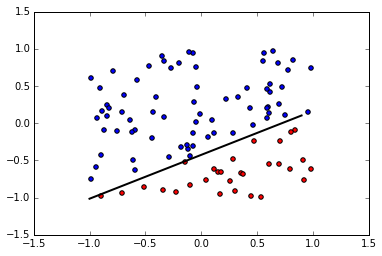

In [62]:
# shows that the normalized weights are useful for direct plotting
# rather than using the two points to form a line

import matplotlib.pyplot as plt
%matplotlib inline
# x = np.arange(-1,1, 0.1)
# y = w_norm[1]*x + w_norm[2]
# plt.plot(x,y, color='k', linestyle='-', linewidth=2)
# # plt.plot([li[0], li[1]],[li[2],li[3]], color='k', linestyle='-', linewidth=2)

# pos_x = []
# neg_x = []
# pos_x2 = []
# neg_x2 = []
# for i in xrange(len(d_[0])):
#     if d_[3][i] == 1:
#         pos_x.append(d_[1][i])
#         pos_x2.append(d_[2][i])
#     else:
#         neg_x.append(d_[1][i])
#         neg_x2.append(d_[2][i])
        
# plt.scatter(pos_x, pos_x2)
# plt.scatter(neg_x, neg_x2, c='r')

### Question 9
Answer Choice: **A**, 350 <br>
Reasoning: see above code. Remember, our initialization is all 0s for our weights, and termination is when the magnitude of the difference between the current step and the previous step weights is $< 0.01$, and the learning rate is $\eta = 0.01$.

### Question 10
Answer Choice: **E**, $e_n(w) = - \text{min}(0, y_n w^Tx_n)$ <br>
Reasoning: SGD is similar to PLA in that it decreses the error with respect to one data point at a time. Now, looking at the example in 3.3 from the book (Exercise 3.10), we simply find any SGD error function such that it makes no descent when the hypothesis ($w^Tx_n$) of the data point matches the solution ($y_n$) of that data point, and then updates when the hypothesis does NOT match the solution. We also look for errors which don't update (0) for the hypothesis matches the solution.

Thus it spans (analyzes each) all data points and adjusts for the ones that the error is wrong (repeating with the entire data set as new after each adjustment). 

Thus, we know that a, b, d is incorrect because it will always adjust no matter what (we see a is always positive, if correct 2x positive).

So, between c and e, we note that c will spiral out of control because it will always adjust positively, unless we start with the hypothesis matching the solution. 

Thus, the answer must be e. This makes sense because when the hypothesis ($w^Tx_n$) is NOT of the same classification or sign to the solution ($y_n$), the value must be opposite of each other (ie. a negative value), and so the error will choose this over 0 (because minimum), and then convert it to a positive value. However, when they ARE of the same sign, then both hypothesis and solution are either positive or negative, and will result in a positive value, leaving our error to correctly choose 0 as the minimum (meaning we correctly classified the point and will not update for this point), and -0 is still 0.